In [306]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc
from matplotlib.tri import Triangulation
from sklearn.linear_model import LinearRegression

In [203]:
a0_sizes = [0.416,0.551,0.465,0.475,0.755,0.548,0.505,0.498,0.551]
dt_list = [6e-3,9e-3,1e-2,1e-2,6e-3,9e-3,9e-3,1e-2,9e-3]

In [257]:
1/np.mean(dt_list)

115.38461538461539

In [377]:
wound_sizes = ['0.387', '0.46','0.401','0.42','0.383','0.415','0.342','0.485','0.405']
tissues_list = [1,2,3,4,5,6,7,8,9]
LW1_list = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
#[0.0, 0.2, 0.4, 0.6, 0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.4, 2.8, 3.2, 3.6, 4.0]
L1_list = [0, .5, 1.0,1.5,2.0, 2.5, 3.0, 3.5, 4.0]
#[20, 21, 22, 23, 24, 25, 26, 27,28,29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,45,46, 47,48,49,50,51,52,53,54,55]

a1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
p1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
t_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
t1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))

for tissue in range(len(tissues_list)):
    p1_list = []
    a1_list = []
    t_list = []
    t1_list = []
    for lr in L1_list:
        for lw in LW1_list:
            with open('tissue225_1t/tissue'+str(tissues_list[tissue])+'/woundinfoA'+wound_sizes[tissue]+'G1L-'+str(lr)+'Lw-'+str(lw)+'Ncells225.txt','r') as text:
                for line in text:
                    pass
                last_line = (line.replace("\n","")).split(' ')
                #print(last_line)
                t_list.append([lr,lw,float(last_line[0])])
                t1_list.append([lr,lw,float(last_line[1])])
                p1_list.append([lr,lw,float(last_line[2])])
                a1_list.append([lr,lw,float(last_line[3])])
                

    a1_array = np.array(a1_list)
    p1_array = np.array(p1_list)
    t_array = np.array(t_list)
    t1_array = np.array(t1_list)

    
    for i in range(a1_array.shape[0]):
        a1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (a1_array[i,2]>float(wound_sizes[tissue]))
        
    
    for i in range(p1_array.shape[0]):
        p1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = p1_array[i,2]
        
    
    for i in range(t_array.shape[0]):
        t_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (t_array[i,2])
        
    for i in range(t1_array.shape[0]):
        t1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (t1_array[i,2])
        


(0.0, 4.0)

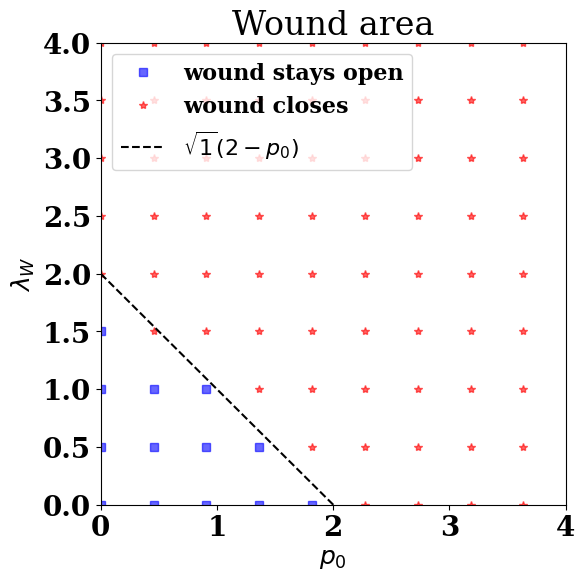

In [378]:
plt.figure(figsize=(6,6))

for i in range(len(L1_list)*len(LW1_list)):
    if a1_array[i,2]>0.38:
        if i == 0:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'bs',alpha=0.6,label = "wound stays open")
        else:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'bs',alpha=0.6)
    if a1_array[i,2]<0.38:
        if i == len(L1_list)*len(LW1_list)-1:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'r*',alpha=0.6,label = "wound closes")
        else:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'r*',alpha=0.6)


beta1_lin = np.array(L1_list) 
lambda1_lin = np.array(LW1_list)

x1_fit = np.arange(0,43)/10/(0.38*2)
y1_fit = np.sqrt(1)*(2-x1_fit)
plt.plot(x1_fit,y1_fit,'k--',label="$\sqrt{1}(2 - p_0)$")

beta_fit = np.array([2.5, 2,1,0]).reshape((-1,1))/(0.55*2)
lambda_fit = np.array([0,0.5,1.5,2.5])

#plt.plot(beta_fit,lambda_fit,'k--',label="$(3.0 - \\beta)$")


plt.xlabel("$p_0$",fontsize = 18)
plt.ylabel("$\lambda_W$",fontsize = 18)
plt.title("Wound area",fontsize=24)
plt.legend(fontsize=16)
plt.ylim(0,4)
plt.xlim(0,4)

In [379]:
theta1 = t_array1
beta1=np.zeros((len(tissues_list),len(L1_list)))
lambda1 = np.zeros((len(tissues_list),len(LW1_list)))

for w in range(len(wound_sizes)):
    beta1[w] = beta1_lin/(float(a0_sizes[w])*2)
    
for w in range(len(wound_sizes)):
    lambda1[w] = lambda1_lin/(float(a0_sizes[w])**(3/2))



In [380]:
lambda1

array([[ 0.        ,  1.86350262,  3.72700525,  5.59050787,  7.45401049,
         9.31751312, 11.18101574, 13.04451836, 14.90802098],
       [ 0.        ,  1.22248237,  2.44496475,  3.66744712,  4.8899295 ,
         6.11241187,  7.33489424,  8.55737662,  9.77985899],
       [ 0.        ,  1.5768507 ,  3.1537014 ,  4.7305521 ,  6.3074028 ,
         7.8842535 ,  9.46110419, 11.03795489, 12.61480559],
       [ 0.        ,  1.52731842,  3.05463684,  4.58195526,  6.10927369,
         7.63659211,  9.16391053, 10.69122895, 12.21854737],
       [ 0.        ,  0.76216601,  1.52433202,  2.28649803,  3.04866404,
         3.81083005,  4.57299606,  5.33516207,  6.09732808],
       [ 0.        ,  1.23253473,  2.46506947,  3.6976042 ,  4.93013893,
         6.16267367,  7.3952084 ,  8.62774313,  9.86027786],
       [ 0.        ,  1.39326246,  2.78652493,  4.17978739,  5.57304986,
         6.96631232,  8.35957479,  9.75283725, 11.14609972],
       [ 0.        ,  1.42274147,  2.84548294,  4.26822441,  5

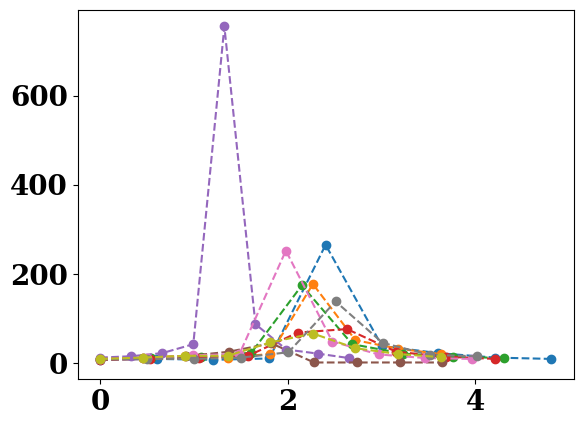

In [381]:
plt.plot(beta1[0,:],theta1[0,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[1,:],theta1[1,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[2,:],theta1[2,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[3,:],theta1[3,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[4,:],theta1[4,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[5,:],theta1[5,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[6,:],theta1[6,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[7,:],theta1[7,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[8,:],theta1[8,:,0],'o--',label="$1.983 A_0$")

#plt.yscale('log')
#plt.xscale('log')

In [382]:
import scipy as scp

Text(0.5, 0, '$p_0$')

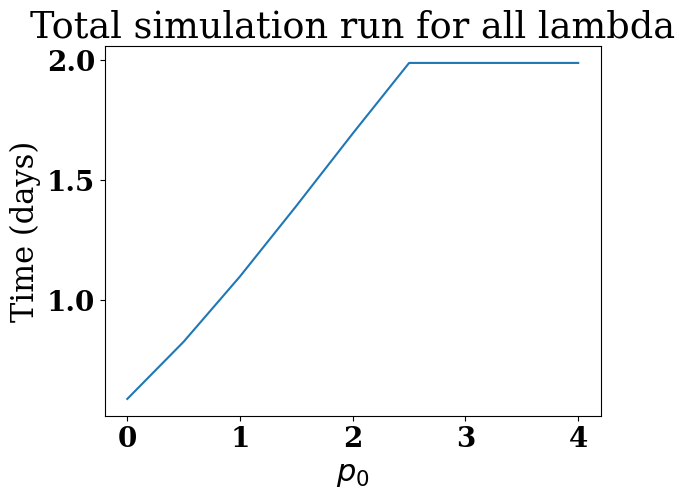

In [383]:
x_data = np.array([0, .5, 1.0,1.5,2.0, 2.5, 3.0, 3.5, 4.0])
T_sim = 25*np.sum(np.array([3,1,1,1,1,1,0,0,0])*np.array([scp.stats.norm.pdf(x_data, x_mu,1.5) for x_mu in x_data]),axis=0)
plt.plot(x_data,np.cumsum(10*(T_sim)/60)/24)
plt.title("Total simulation run for all lambda")
plt.ylabel("Time (days)")
plt.xlabel("$p_0$")
#plt.yscale('log')

(0.0, 4.0)

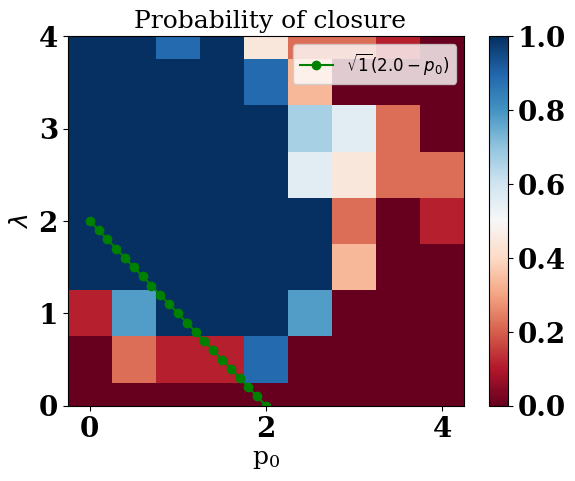

In [384]:
plt.pcolormesh(beta1_lin, lambda1_lin,np.mean(t1_array1,axis=0),cmap='RdBu')
plt.colorbar()
plt.clim(0,1)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
plt.title(" Probability of closure",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 18,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 18,fontdict= {'family':'serif'})

x1_fit = np.arange(0,40)/10
y1_fit = np.sqrt(1)*(2-x1_fit)
plt.plot(x1_fit,y1_fit,'g-o',label="$\sqrt{1}(2.0- p_0)$")
plt.legend(fontsize=12,prop=font)
plt.ylim(0.0,4)

In [385]:
a1_array1.shape

(9, 9, 9)

In [386]:
def bin_xyzbig(x_vec,y_vec,z_array,n_bins,wound_l):
    
    min_x = np.ma.min(x_vec)
    max_x = np.ma.max(x_vec)#int(np.sqrt(len(x_vec)))
        
        
    min_y = np.ma.min(y_vec)
    max_y = np.ma.max(y_vec)
        
    bin_sizex = (max_x - min_x)/n_bins
    bin_sizey = (max_y - min_y)/n_bins

    binsx = np.arange(min_x,max_x,bin_sizex)
    binsy = np.arange(min_y,max_y,bin_sizey)
    z_bin = np.zeros((wound_l,binsx.shape[0],binsy.shape[0]))
    
    for l in range(wound_l):
        for i in range(n_bins-1):
            bin_vecx = list(np.where((x_vec[l]>= binsx[i])== (x_vec[l] < binsx[i+1]))[0])
            for j in range(n_bins-1):
                bin_vecy = list(np.where((y_vec[l]>= binsy[j])== (y_vec[l] < binsy[j+1]))[0])
                #bin_vec = list(set(bin_vecx).intersection(bin_vecy))
                if (len(bin_vecx) < 1) or (len(bin_vecy) < 1):
                    z_bin[l,j,i] = 0
                else:
                    z_bin[l,j,i] = np.nanmean(z_array[l,bin_vecx,:][:,bin_vecy])
    return z_bin,binsx,binsy


In [387]:
a_array0,betax,lambday = bin_xyzbig(beta1,lambda1,a1_array1,len(L1_list),len(wound_sizes))
t1_array0,betax,lambday = bin_xyzbig(beta1,lambda1,t1_array1,len(L1_list),len(wound_sizes))
t_array0,betax,lambday = bin_xyzbig(beta1,lambda1,t_array1,len(L1_list),len(wound_sizes))
for i in range(len(dt_list)):
    t_array0[i] = t_array0[i]*dt_list[i]

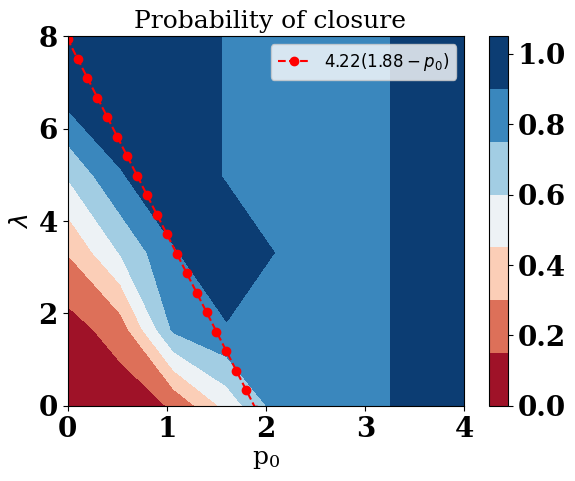

In [396]:
plt.contourf(betax, lambday,1-np.mean(a_array0,axis=0),cmap='RdBu',vmin = np.min(np.mean(a_array0,axis=0))-0.1,vmax = np.min(np.mean(a_array0,axis=0))+0.1)
plt.colorbar(ticks=np.arange(0,11,2)/10)
plt.clim(0,1)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
plt.title(" Probability of closure",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 18,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 18,fontdict= {'family':'serif'})
font1 = {'family' : 'serif',
        'size'   : 22}
rc('font', **font1)


x1_fit = np.arange(-10,40)/10
y1_fit = 4.22*(1.88-x1_fit)
plt.plot(x1_fit,y1_fit,"r--o",label="$4.22(1.88- p_0)$")
plt.legend(fontsize=12,prop=font)
plt.ylim(0.0,8)
plt.xlim(0,4)
plt.show()

(0.0, 4.0)

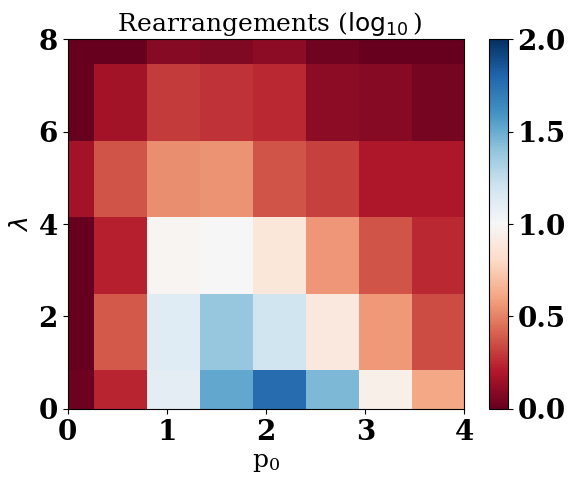

In [389]:
plt.pcolormesh(betax, lambday,np.log10(np.mean(t1_array0,axis=0)+1),cmap='RdBu')
plt.colorbar()
plt.clim(0,2)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
plt.title(" Rearrangements ($\log_{10}$)",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 18,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 18,fontdict= {'family':'serif'})

font1 = {'family' : 'serif',
        'size'   : 22}
rc('font', **font1)

#x1_fit = np.arange(0,40)/10
#y1_fit = np.sqrt(2)*(1.75-x1_fit)
#plt.plot(x1_fit,y1_fit,'g-o',label="$\sqrt{1}(2.0- p_0)$")
#plt.legend(fontsize=12,prop=font)
plt.ylim(0.0,8)
plt.xlim(0.0,4)

(0.0, 4.0)

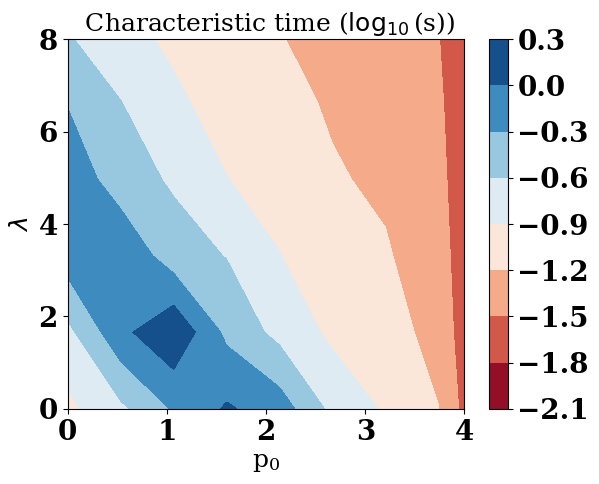

In [392]:
plt.contourf(betax, lambday,np.log10((np.mean(t_array0+0.01,axis=0))),cmap='RdBu')
plt.colorbar()
#plt.clim(0,22)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
plt.title(" Characteristic time ($\log_{10}$(s))",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 18,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 18,fontdict= {'family':'serif'})

font1 = {'family' : 'serif',
        'size'   : 22}
rc('font', **font1)

#x1_fit = np.arange(0,40)/10
#y1_fit = np.sqrt(2)*(1.75-x1_fit)
#plt.plot(x1_fit,y1_fit,'g-o',label="$\sqrt{1}(2.0- p_0)$")
#plt.legend(fontsize=12,prop=font)
plt.ylim(0.0,8)
plt.xlim(0.0,4)

In [367]:
B,L = np.meshgrid(betax,lambday)

Z = np.log(2)/2*1.9/np.abs((L+B-1.9))

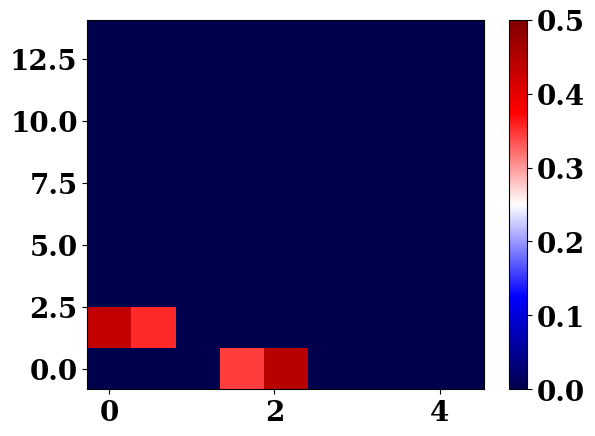

In [368]:
plt.pcolormesh(B,L,np.log10(Z),cmap='seismic')
plt.colorbar()
plt.clim(0,0.5)

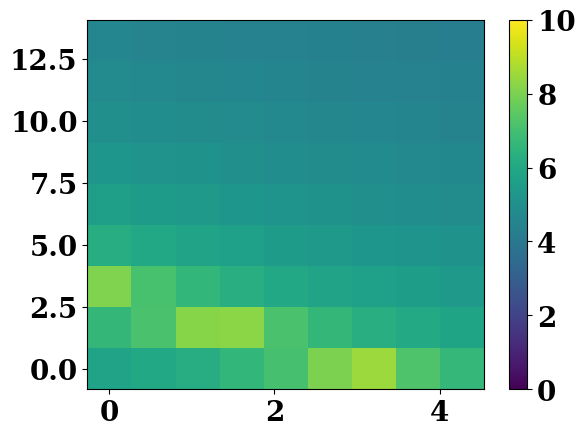

In [369]:
plt.pcolormesh(B,L,np.log(1/np.abs(L+B-3)/0.001))
plt.colorbar()
plt.clim(0,10)